In [4]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Bidirectional, GRU, LSTM
import matplotlib.pyplot as plt



In [6]:
max_features = 10000
maxlen = 500
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
def build_and_train_model(model_type):
    model = Sequential()

    if model_type == 'SimpleRNN':
        model.add(Embedding(max_features, 32))
        model.add(SimpleRNN(32))
    elif model_type == 'LSTM':
        model.add(Embedding(max_features, 32))
        model.add(LSTM(32))
    elif model_type == 'Bidirectional':
        model.add(Embedding(max_features, 32))
        model.add(Bidirectional(LSTM(32)))
    elif model_type == 'DeepRNN':
        model.add(Embedding(max_features, 32))
        model.add(SimpleRNN(32, return_sequences=True))
        model.add(SimpleRNN(32))
    else:
        raise ValueError("Невідомий тип моделі")

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)
    return history

simple_rnn_history = build_and_train_model('SimpleRNN')
lstm_history = build_and_train_model('LSTM')
bidirectional_history = build_and_train_model('Bidirectional')
deep_rnn_history = build_and_train_model('DeepRNN')

Epoch 1/10
157/157 [==============================] - 9s 54ms/step - loss: 0.6539 - acc: 0.5962 - val_loss: 0.5241 - val_acc: 0.7646
Epoch 2/10
157/157 [==============================] - 8s 52ms/step - loss: 0.4253 - acc: 0.8155 - val_loss: 0.4772 - val_acc: 0.8062
Epoch 3/10
157/157 [==============================] - 8s 52ms/step - loss: 0.3156 - acc: 0.8719 - val_loss: 0.3780 - val_acc: 0.8394
Epoch 4/10
157/157 [==============================] - 8s 52ms/step - loss: 0.2378 - acc: 0.9085 - val_loss: 0.3777 - val_acc: 0.8456
Epoch 5/10
157/157 [==============================] - 8s 52ms/step - loss: 0.1852 - acc: 0.9312 - val_loss: 0.3981 - val_acc: 0.8576
Epoch 6/10
157/157 [==============================] - 8s 52ms/step - loss: 0.1382 - acc: 0.9526 - val_loss: 0.4293 - val_acc: 0.8434
Epoch 7/10
157/157 [==============================] - 8s 54ms/step - loss: 0.0951 - acc: 0.9686 - val_loss: 0.5620 - val_acc: 0.7952
Epoch 8/10
157/157 [==============================] - 8s 53ms/step - 

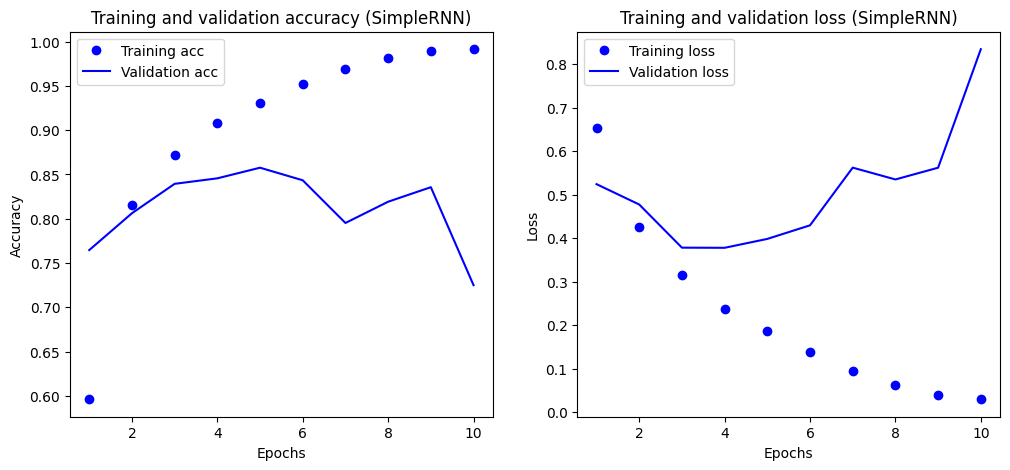

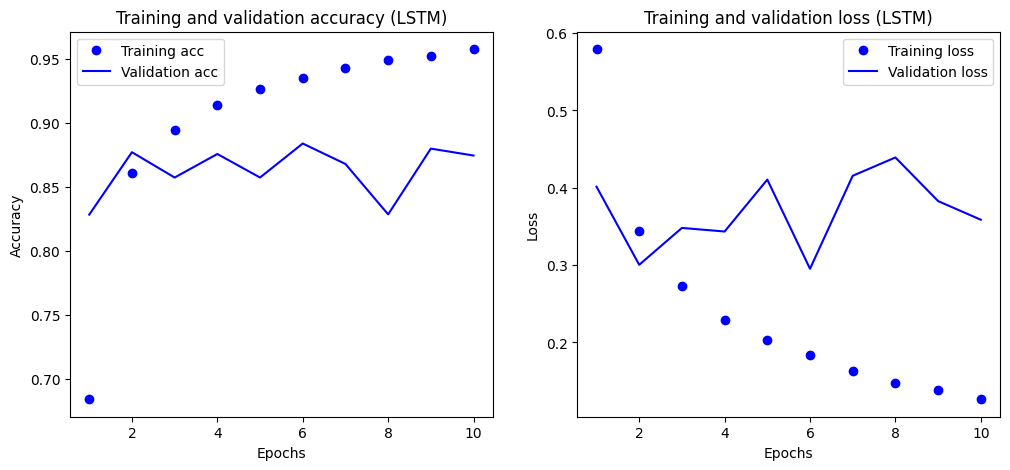

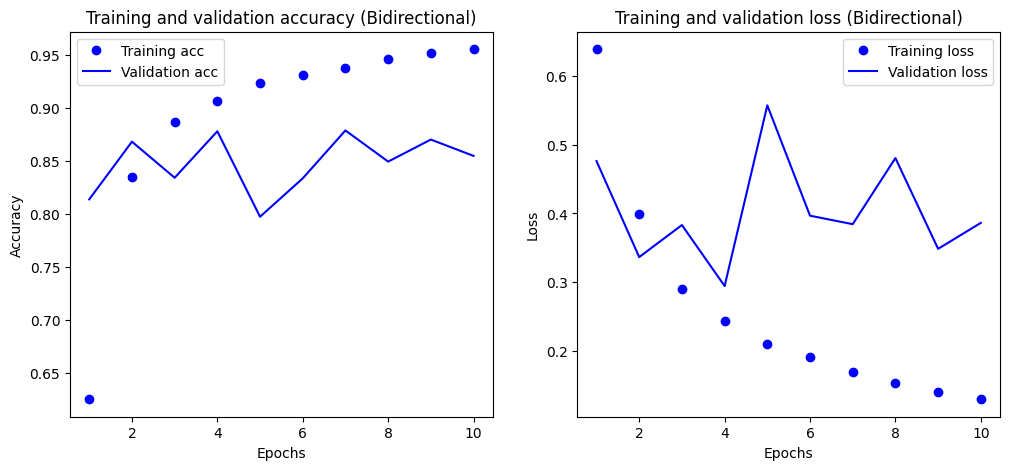

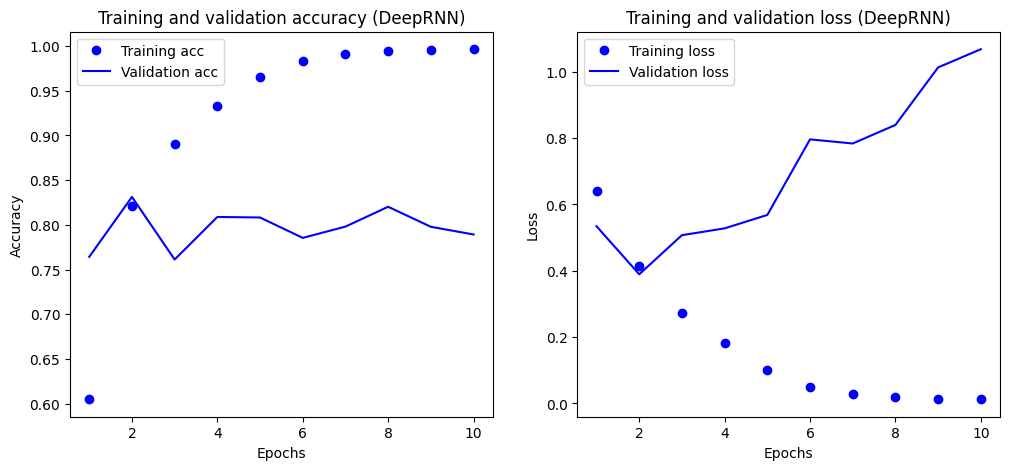

In [7]:
def plot_history(history, model_type):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title(f'Training and validation accuracy ({model_type})')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title(f'Training and validation loss ({model_type})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_history(simple_rnn_history, 'SimpleRNN')
plot_history(lstm_history, 'LSTM')
plot_history(bidirectional_history, 'Bidirectional')
plot_history(deep_rnn_history, 'DeepRNN')